<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
Lecture 7
### Data fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create some data for today's exercise:

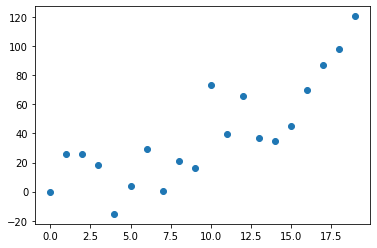

In [2]:
x = np.arange(20)
np.random.seed(42)
r = np.random.random(len(x))
r = (r-0.5)*100
y = x + x**1.5 + np.sin(x/1.8)*r
plt.scatter(x,y)

### Splines
- Use splines to fit to the data provided

In [3]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y) #create a Cubic spline using your data

##### Question:
Plot the spline and your raw data
- How good is the fit?


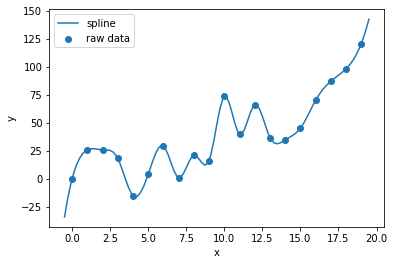

In [4]:
# Solution
xs = np.arange(-0.5, 19.6, 0.2) #create a different interval of x values
plt.plot(xs,cs(xs),label='spline')
plt.scatter(x,y,label='raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Fit your data to a model
- You are a Nasa scientist and your task is to simulate the Mars rover orbital entry flight path.
- LIDAR gives you data on the position of the orbiter as a function of time.
- Fit a function of the position over time
- assume z direction only

In [5]:
# Generate the position data:
h = 5000 #initial height
t = np.arange(10)  #time 

def sigmoid(x, a, b, c, d):
    """ General sigmoid function
    a adjusts amplitude
    b adjusts y offset
    c adjusts x offset
    d adjusts slope """
    y = ((a-b) / (1 + np.exp(x-(c/2))**d)) + b
    return y
a = -10+sigmoid(t, 8, 2, 48, 0.3)*2  #create a(t)
u = -1000 #reentry speed
x = u*t + 0.5*a*t**2 + h + np.random.random(len(t))*2000


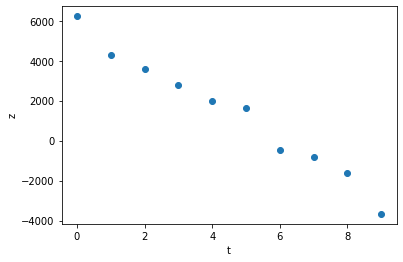

In [6]:
plt.scatter(t,x)
plt.xlabel('t')
plt.ylabel('z')
plt.show()

Start work on your simulation with a linear fit of the data:
- position versus time
- use "from scipy import stats"

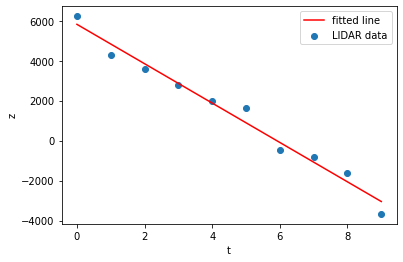

In [7]:
#solution
from scipy import stats
res = stats.linregress(t, x)
plt.scatter(t,x, label ='LIDAR data')
plt.plot(t, res.intercept + res.slope*t, 'r', label='fitted line')
plt.legend()
plt.xlabel('t')
plt.ylabel('z')
plt.show()

Guess a better function to describe the motion and make a fit. How good is the fit?